In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv"
df = pd.read_csv(url)

In [4]:
# print the first 15 rows of the data set
df.head(15)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
6,38.9,17.8,181.0,3625.0,0
7,39.2,19.6,195.0,4675.0,0
8,34.1,18.1,193.0,3475.0,0
9,42.0,20.2,190.0,4250.0,0


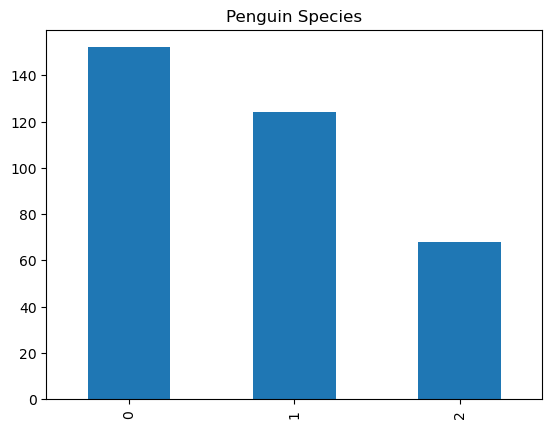

In [5]:
# Lets visualize the distribution of the penguin species with a bar plot in matplotlib
import matplotlib.pyplot as plt
df['Species'].value_counts().plot(kind='bar')
plt.title('Penguin Species')
plt.show()




     

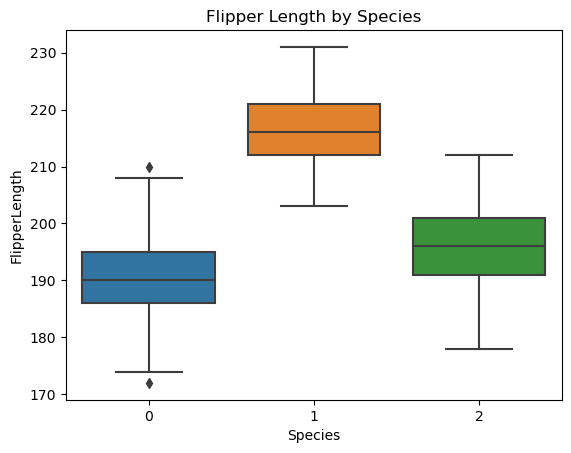

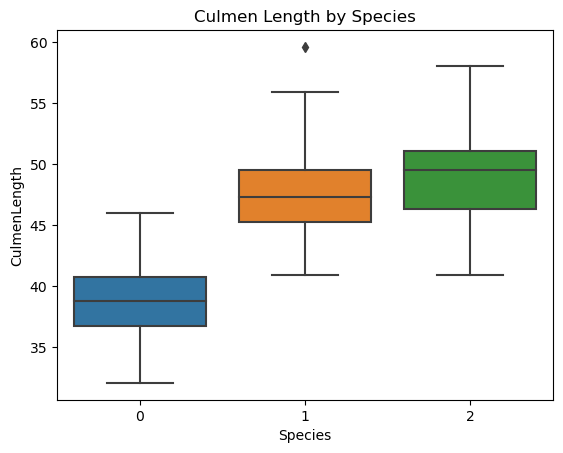

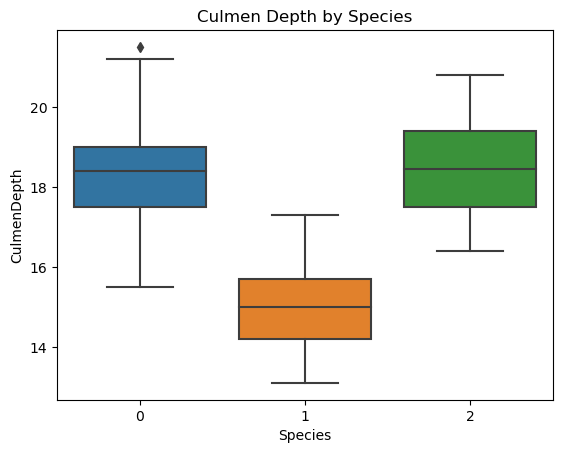

In [7]:
# Let's visualize with boxplots how the FlipperLength, CulmenLength and CulmenDepth are distributed for each species
# import seaborn
import seaborn as sns
sns.boxplot(x='Species', y='FlipperLength', data=df)
plt.title('Flipper Length by Species')
plt.show()
sns.boxplot(x='Species', y='CulmenLength', data=df)
plt.title('Culmen Length by Species')
plt.show()
sns.boxplot(x='Species', y='CulmenDepth', data=df)
plt.title('Culmen Depth by Species')
plt.show()




In [8]:
# Show rows with missuing values
df[df.isnull().any(axis=1)]


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [9]:
# Drop rows with missing values
df = df.dropna()

In [10]:
# Let's prepare the data for training
# 1. Split the data into features and labels
# 2. Split the data into training and test sets
# Split the data into features and labels
# feature are CulmenLength, CulmenDepth, FlipperLength
# label is Species
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength']
label = 'Species'
X, y = df[features].values, df[label].values



In [11]:
# Split the data into training and test sets in a 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=0)




In [14]:
# Let's train a multiclass Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg', multi_class='auto', max_iter=10000)

# Train the model
model.fit(X_train, y_train)



LogisticRegression(max_iter=10000, solver='newton-cg')

In [16]:
# Let's evaluate the model
# Make predictions and compare them with the actual values
y_pred = model.predict(X_test)
print('Predicted labels: ', y_pred)

# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Predicted labels:  [0 2 0 2 0 2 1 0 1 0 0 1 1 0 0 1 1 1 0 0 2 0 2 1 0 0 1 2 1 1 0 0 0 1 1 0 2
 1 2 0 0 0 0 1 0 0 2 1 1 2 0 0 0 0 2 0 1 0 0 2 0 0 0 1 0 0 0 1 0 1 0 2 0 0
 1 0 2 0 0 1 0 1 1 0 1 1 2 0 1 2 0 0 1 0 1 1 0 1 2 1 1 1 0]
Accuracy:  0.9902912621359223
